# NetworkX Introduction - Lab

## Introduction

In this lab, you'll practice some of the introductory skills for creating graphs using the NetworkX library introduced in the previous lesson. To do this, you'll create a graph to visualize users and businesses from yelp reviews. 

## Objectives

In this lab you will: 

- Create basic network graphs with networkx 
- Add nodes and edges to networkx graphs 
- Visualize network graphs with networkx 

## Import the Data

To start, import the data stored in the file `'Yelp_reviews.csv'`. 

In [2]:
import pandas as pd

df = pd.read_csv('Yelp_reviews.csv')
df.head()


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,7SO_rX1F6rQEl-5s3wZxgQ,2011-10-03,GxaYFCprt-wyqO--vB4PHQ,4,"After my last review, somewhat scathing regard...",review,J3I2NClEbD1Xr8lOdjxlqQ,1,2,1
1,K2_Hmmo5crTYWiT_1sWnfQ,2011-12-22,FSrIgThMfFIh__TubVQkxw,3,"Ok, so I'm catching up on past-due reviews. F...",review,J3I2NClEbD1Xr8lOdjxlqQ,0,0,0
2,FeI75xIG8PF_XZ6P80gLBQ,2012-06-04,eeJ10gamdNebtq028i0BvA,3,"I want to like Turf, but the food is just okay...",review,64YY0h0ZAR2nbzxbx0IwJg,2,1,0
3,6imLt53br7SJ3av07jjH7w,2012-11-06,SPDbkT9WXghJedf1xxYnOg,5,It's the place to be. \n\nI went before headin...,review,Ypz7hxOCnrg8Y8vxHJU-sQ,0,0,0
4,zmFc8M-hS4uuyY0hklIpoQ,2011-01-17,A2lCUSvDJfIa5kwUoFFk8A,4,A definite favorite in the neighborhood.\n\nTh...,review,nDBly08j5URmrHQ2JCbyiw,2,3,2


## Creating a Graph

Now, create an initial graph!

In [4]:
import networkx as nx
G = nx.Graph()

## Adding Nodes 

Create a node for each user and each business in the dataset. Networks with multiple node types like this are called **bimodal networks**.

Optionally, go further by creating a list of colors for when you visualize the graph. If you do this, append the color "green" to your color list every time you add a user node and append the color "blue" to your color list every time you add a business node.

In [5]:
names = {}
node_color = []
for n, person in enumerate(df.user_id.unique()):
    name = 'User{}'.format(n)
    names[person] = name
    G.add_node(name)
    node_color.append('green')
for n, biz in enumerate(df.business_id.unique()):
    name = 'Business{}'.format(n)
    names[biz] = name
    G.add_node(name)
    node_color.append('blue')  

## Adding Edges

Next, iterate through the dataset and create an edge between users and the businesses they have reviewed.

In [6]:
for row in df.index:
    user = df['user_id'][row]
    u_name = names[user]
    biz = df['business_id'][row]
    b_name = names[biz]
    G.add_edge(u_name, b_name)

## Visualizing the Graph

Finally, create a visualization of your network. If you chose to color your nodes, pass the list of colors through the optional `node_color` parameter.

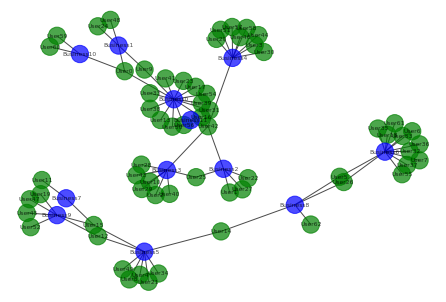

In [10]:
%matplotlib inline
nx.draw(G, with_labels=True, alpha=0.7, font_size=6, node_size=300, node_color=node_color)

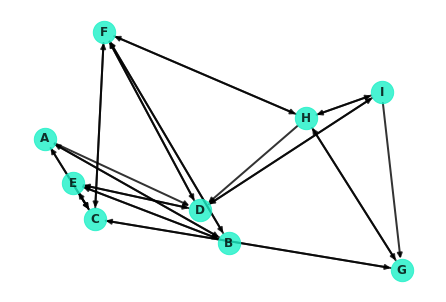

In [21]:
G = nx.navigable_small_world_graph(3, seed=0)
G = nx.relabel_nodes(G, dict(zip(G.nodes, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])))
nx.draw(G, 
        pos=nx.random_layout(G, seed=9), 
        with_labels=True, 
        node_color='#1cf0c7',
        node_size=500, 
        font_weight='bold', 
        width=2, 
        alpha=0.8)

In [26]:
nx.has_path(G, 'C', 'I')

True

In [27]:
nx.shortest_path(G, 'C', 'I')

['C', 'A', 'D', 'I']

In [25]:
nx.shortest_path_length(G, 'C', 'I')

3

## Access edges

In [28]:
G.edges

OutEdgeView([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'A'), ('B', 'E'), ('B', 'F'), ('C', 'A'), ('C', 'F'), ('C', 'G'), ('C', 'E'), ('D', 'E'), ('D', 'F'), ('D', 'I'), ('E', 'B'), ('E', 'D'), ('E', 'C'), ('F', 'B'), ('F', 'C'), ('F', 'D'), ('F', 'H'), ('G', 'C'), ('G', 'H'), ('H', 'F'), ('H', 'G'), ('H', 'I'), ('H', 'D'), ('I', 'D'), ('I', 'H'), ('I', 'G')])

In [31]:
# get specific edge
G.edges[('F', 'H')]  # if you have one that doesn't exist, you get an error

{}

In [37]:
# get OUTBOUND connections
# they aren't weighted yet
G['F']

AtlasView({'B': {}, 'C': {}, 'D': {}, 'H': {}})

<class 'tuple'> ('A', 'B')
<class 'tuple'> ('A', 'C')
<class 'tuple'> ('A', 'D')
<class 'tuple'> ('B', 'A')
<class 'tuple'> ('B', 'E')
<class 'tuple'> ('B', 'F')
<class 'tuple'> ('C', 'A')
<class 'tuple'> ('C', 'F')
<class 'tuple'> ('C', 'G')
<class 'tuple'> ('C', 'E')
<class 'tuple'> ('D', 'E')
<class 'tuple'> ('D', 'F')
<class 'tuple'> ('D', 'I')
<class 'tuple'> ('E', 'B')
<class 'tuple'> ('E', 'D')
<class 'tuple'> ('E', 'C')
<class 'tuple'> ('F', 'B')
<class 'tuple'> ('F', 'C')
<class 'tuple'> ('F', 'D')
<class 'tuple'> ('F', 'H')
<class 'tuple'> ('G', 'C')
<class 'tuple'> ('G', 'H')
<class 'tuple'> ('H', 'F')
<class 'tuple'> ('H', 'G')
<class 'tuple'> ('H', 'I')
<class 'tuple'> ('H', 'D')
<class 'tuple'> ('I', 'D')
<class 'tuple'> ('I', 'H')
<class 'tuple'> ('I', 'G')


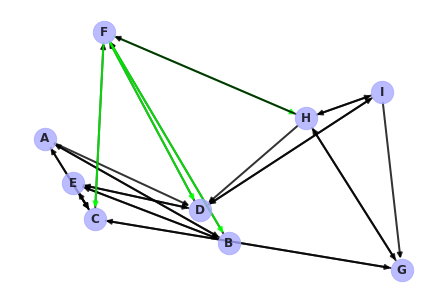

In [49]:
colors = []
for edge in G.edges:
    # To learn more about what's happening, uncomment this line (warning: verbose printout!)
    print(type(edge), edge) 
    if edge[0] == 'F':
        colors.append('#00ff00')
    else:
        colors.append('000000')
nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color='#aaaaff',
        node_size=500, font_weight='bold', width=2, alpha=.8, edge_color=colors)

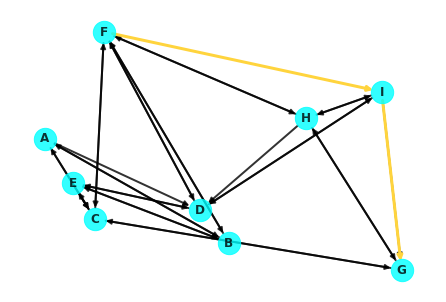

In [53]:
nx.draw(G, nx.random_layout(G, seed=9), with_labels=True, node_color='#00ffff',
        node_size=500, font_weight='bold', width=2, alpha=0.8)

nx.draw_networkx_edges(G, nx.random_layout(G, seed=9), width=3,
                       edgelist=[('F', 'I'), ('I','G')], edge_color='#ffd43d');

# Under the Hood: Dijkstra's Algorithm
Dijkstra's algorithm is essentially a depth based search. It commences at the starting node, spanning out to neighboring nodes and in turn visiting their neighbors in search of the destination. More formally, here's a general pseudo-code outline for the algorithm:

- Mark all nodes as unvisited
- Set the distance of the starting node as 0, and  ∞  for all other nodes
- Set the starting node as the current node
- Visit each of the neighbors of the current node
- For each neighbor, calculate the distance to that node traveling through the current node
- If this distance is less then the current distance recorded for that node, update the record accordingly
- Mark the current node as 'visited'
- Of the unvisited nodes, set the one with the smallest distance to the current node
- Repeat steps 4 through 6 until one of the following:
    - The algorithm terminates when the destination node is the current node
    - Alternatively, if the smallest distance of the unvisited nodes is  ∞ , then no path exists to the destination node
- Note: Dijkstra's algorithm (and NetworkX's implementations demonstrated above) returns a single path. In many cases, there may be multiple paths which are tied for the shortest distance between two nodes. In such cases, it is arbitrary which path is returned.
